In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

data = pd.read_csv("Car_Insurance_Claim.csv")

data

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


## Задача: представлены признаки клиентов, оформивших страховку на автомобиль. Необходимо научиться определять, понадобится ли клиенту страховая выплата, или нет.

### Описание признаков

* AGE - возраст
* GENDER - пол (male/female)
* RACE - принадлежность/непринадлежность к расовым меньшинствам (majority/minority)
* DRIVING_EXPERIENCE - опыт вождения (4 категории в зависимости от опыта)
* EDUCATION - уровень образования (3 категории)
* INCOME - уровень доходов (4 класса по доходам)
* CREDIT_SCORE - кредитный рейтинг (0..1)
* VEHICLE_OWNERSHIP - владение страхуемым автомобилем (1/0)
* VEHICLE_YEAR - год выпуска автомобиля (до 2015/после 2015)
* MARRIED - нахождение в браке (1/0)
* CHILDREN - наличие детей (1/0)
* POSTAL_CODE - почтовый индекс
* ANNUAL_MILEAGE - среднегодовой пробег
* VEHICLE_TYPE - тип ТС (седан/спорткар)
* SPEEDING_VIOLATIONS - количество превышений скорости
* DUIS - вождение в нетрезвом виде (число нарушений)
* PAST_ACCIDENTS - количество предыдущих ДТП
* OUTCOME - 1, если клиенту понадобилась страховая выплата, 0 в противном случае

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [3]:
col_lower = [i.lower() for i in data.columns]

data.columns = col_lower

data = data

In [4]:
data.drop(["id"], axis = 1, inplace = True)

Почтовый индекс целесообразно рассматривать как категориальную переменную

In [5]:
data['postal_code'].unique()

array([10238, 32765, 92101, 21217], dtype=int64)

In [6]:
data['postal_code']=np.vectorize(lambda x: str(x))(data['postal_code'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  object 
 1   gender               10000 non-null  object 
 2   race                 10000 non-null  object 
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  object 
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [8]:
data.describe()

,credit_score,vehicle_ownership,married,children,annual_mileage,speeding_violations,duis,past_accidents,outcome
count,9018.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.515813,0.697000,0.498200,0.688800,11697.003207,1.482900,0.23920,1.056300,0.313300
std,0.137688,0.459578,0.500022,0.463008,2818.434528,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,0.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.417191,0.000000,0.000000,0.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.525033,1.000000,0.000000,1.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,0.618312,1.000000,1.000000,1.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [9]:
data

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


### Рассмотрим распределение целевой переменной

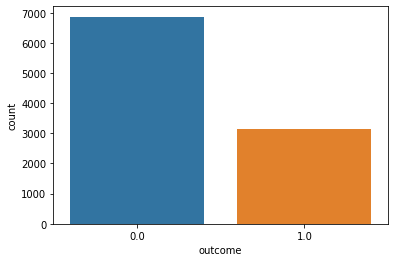

In [10]:
sns.countplot(data['outcome'])

Видим, что классы не сбалансированы. Возможно, необходимо будет применить методы балансировки.





### Посмотрим на распределение категориальных признаков (сразу с разбиением по outcome)

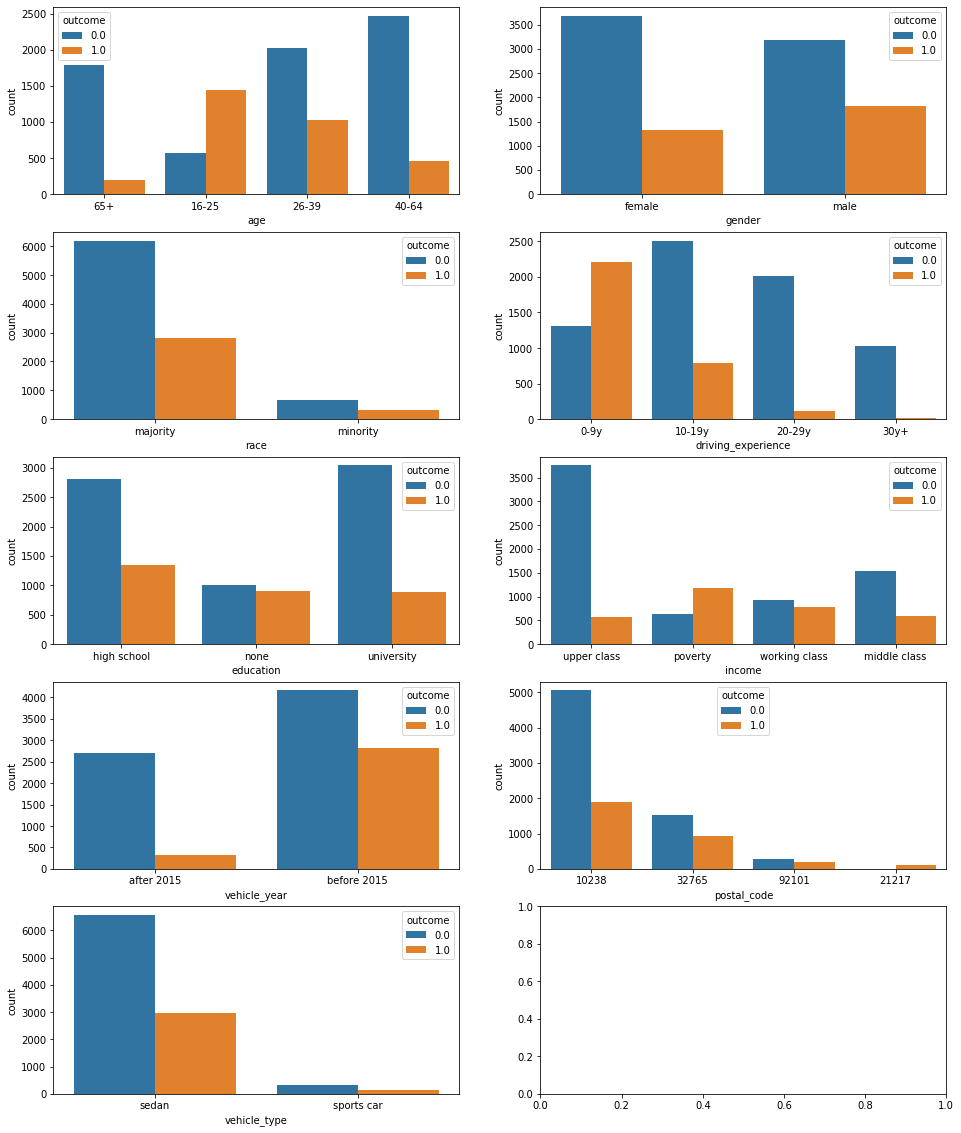

In [11]:
fig, ax = plt.subplots(5, 2, figsize = (16, 20))

for col, ax in zip(data.select_dtypes("object").columns, ax.flat[:]):
    sns.countplot(data = data, x = col, ax = ax, hue = "outcome")

Большинство признаков выглядят значащими, за исключением, возможно race, postal_code и vehicle_type

### Рассмотрим распределения (плотности) и характеристики числовых признаков. Воспользуемся скрипичными графиками

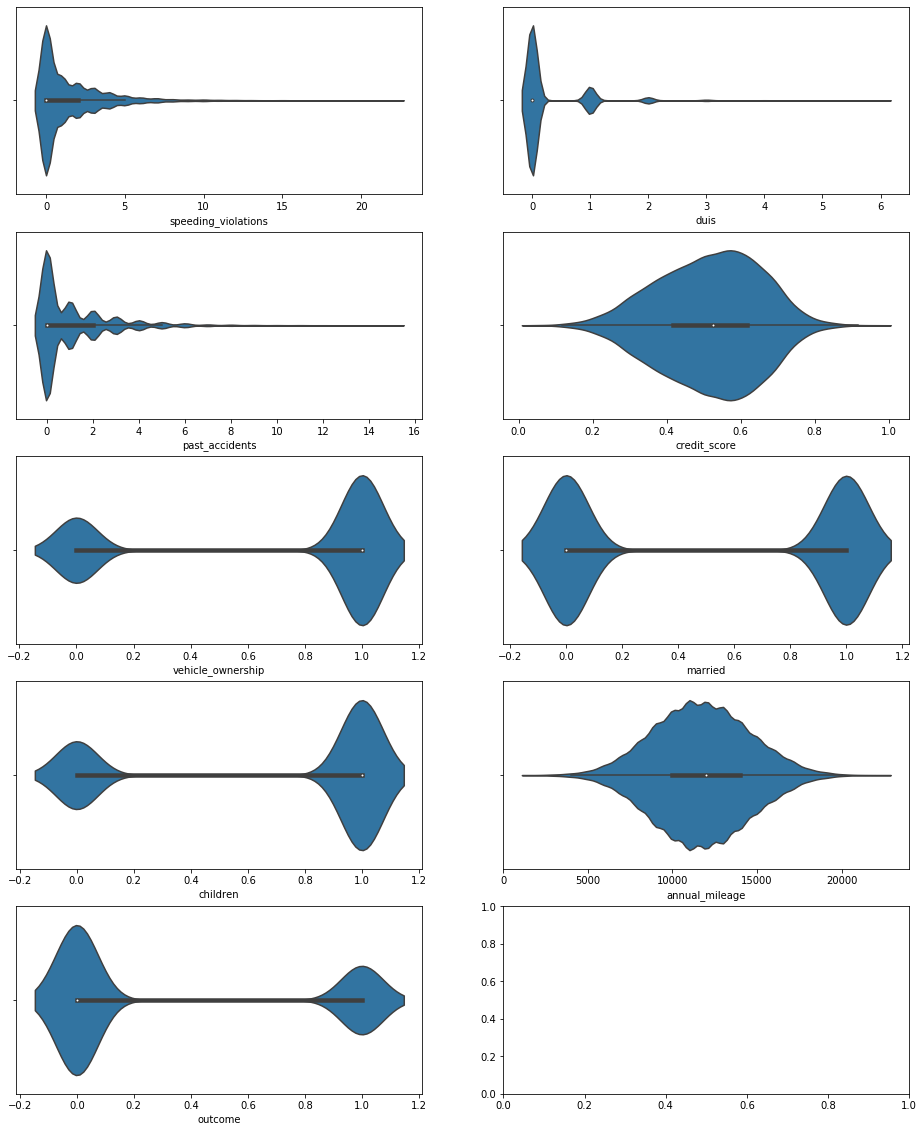

In [12]:
fig, axis = plt.subplots(5, 2, figsize = (16, 20))

for col, ax in zip(data.select_dtypes("int64").columns.append(data.select_dtypes("float64").columns), axis.flat[:]):
    sns.violinplot(x = data[col], ax = ax)

Распределение credit_score и annual_mileage близко к нормальному, остальные признаки либо бинарные, либо содержат несколько неотрицательных целых значений, имея при этом нулевую медиану.

Также построим распределения (плотности) с учётом outcome

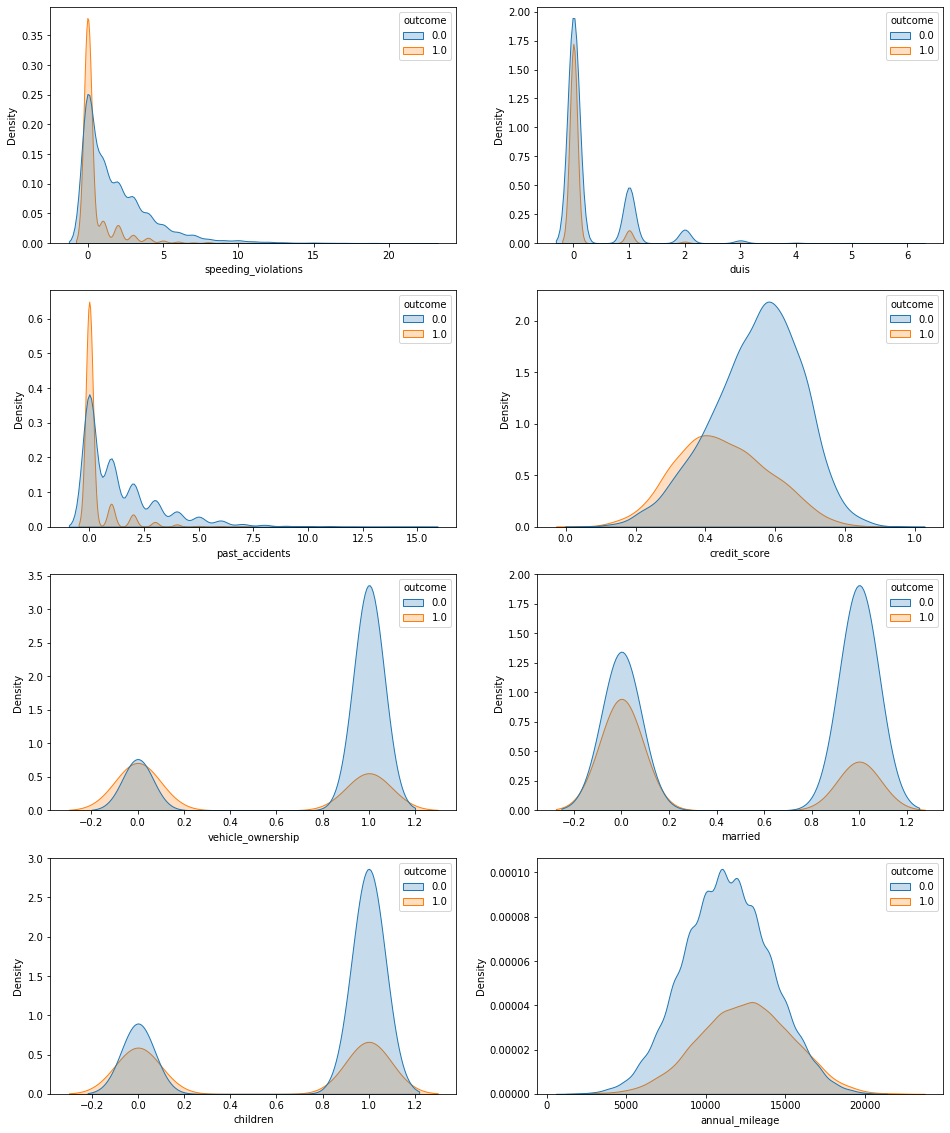

In [13]:
fig, axis = plt.subplots(4, 2, figsize = (16, 20))

for col, ax in zip(data.select_dtypes("int64").columns.append(data.select_dtypes("float64").columns), axis.flat[:]):
    sns.kdeplot(data = data, x = col, ax = ax, hue = "outcome", fill = True)

Из интересного отметим различия в форме графиков плотности для нескольких параметров для тех кому понадобилась страховая выплата, и для тех кому не понадобилась

### Вспомним, что в данных присутствуют пропуски
В принципе, данных достаточно и мы могли бы отбросить наблюдения с пропущенными значениями. Однако попробуем заполнить пропуски. Для этого сначала проанализируем признаки, где присутствуют пропущенные значения.

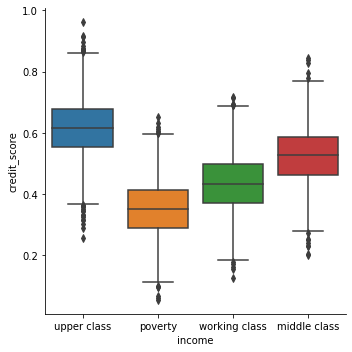

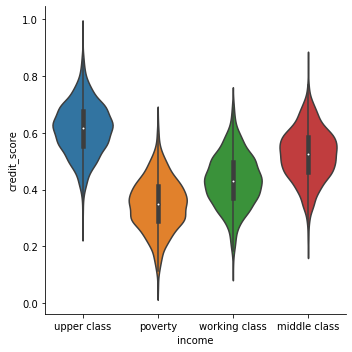

In [14]:
sns.catplot(data=data, kind="box", x="income", y="credit_score")
sns.catplot(data=data, kind="violin", x="income", y="credit_score")

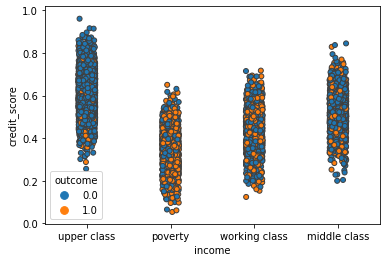

In [15]:
sns.stripplot(data=data, x="income", y="credit_score", hue="outcome", linewidth=1)

Как мы можем видеть, credit_score существенно зависит от принадлежности к той или иной группе по доходам. Целесообразно заполнять пропуски медианой по доходной группе, а не всему набору данных.

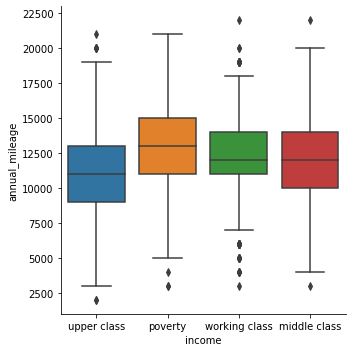

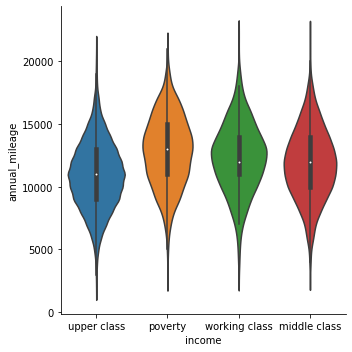

In [16]:
sns.catplot(data=data, kind="box", x="income", y="annual_mileage")
sns.catplot(data=data, kind="violin", x="income", y="annual_mileage")

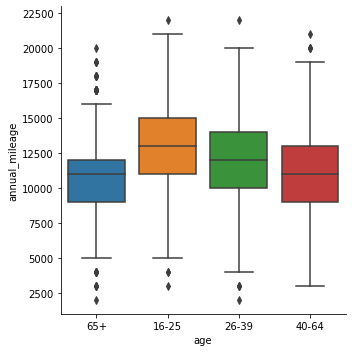

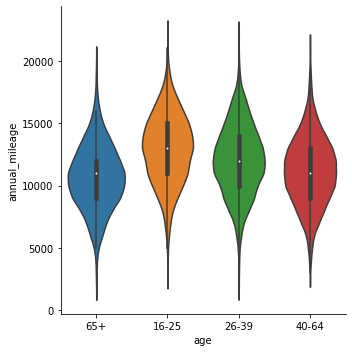

In [17]:
sns.catplot(data=data, kind="box", x="age", y="annual_mileage")
sns.catplot(data=data, kind="violin", x="age", y="annual_mileage")

Для annual_mileage мы не видим серьёзной дифференциации в зависимости от группы по доходам, или возраста. Можем просто заполнить медианным значением

In [18]:
upper_class_median = data[data['income'] == 'upper class']['credit_score'].median()
middle_class_median = data[data['income'] == 'middle class']['credit_score'].median()
poverty_class_median = data[data['income'] == 'poverty']['credit_score'].median()
working_class_median = data[data['income'] == 'working class']['credit_score'].median()

In [19]:
data.loc[(data[(data['income'] == 'working class') & data['credit_score'].isnull()].index),'credit_score'] = data[data['income'] == 'working class']['credit_score'].fillna(working_class_median)
data.loc[(data[(data['income'] == 'poverty') & data['credit_score'].isnull()].index),'credit_score'] = data[data['income'] == 'poverty']['credit_score'].fillna(poverty_class_median)
data.loc[(data[(data['income'] == 'middle class') & data['credit_score'].isnull()].index),'credit_score'] = data[data['income'] == 'middle class']['credit_score'].fillna(middle_class_median)
data.loc[(data[(data['income'] == 'upper class') & data['credit_score'].isnull()].index),'credit_score'] = data[data['income'] == 'upper class']['credit_score'].fillna(upper_class_median)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  object 
 1   gender               10000 non-null  object 
 2   race                 10000 non-null  object 
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         10000 non-null  float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  object 
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [21]:
data['annual_mileage'] = data['annual_mileage'].fillna(data['annual_mileage'].median())

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  object 
 1   gender               10000 non-null  object 
 2   race                 10000 non-null  object 
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         10000 non-null  float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  object 
 12  annual_mileage       10000 non-null  float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

### Для обработки категориальных признаков используем дамми-переменные

In [23]:
dumm_data=pd.get_dummies(data)
dumm_data.head()

,credit_score,vehicle_ownership,married,children,annual_mileage,speeding_violations,duis,past_accidents,outcome,age_16-25,...,income_upper class,income_working class,vehicle_year_after 2015,vehicle_year_before 2015,postal_code_10238,postal_code_21217,postal_code_32765,postal_code_92101,vehicle_type_sedan,vehicle_type_sports car
0,0.629027,1.0,0.0,1.0,12000.0,0,0,0,0.0,0,...,1,0,1,0,1,0,0,0,1,0
1,0.357757,0.0,0.0,0.0,16000.0,0,0,0,1.0,1,...,0,0,0,1,1,0,0,0,1,0
2,0.493146,1.0,0.0,0.0,11000.0,0,0,0,0.0,1,...,0,1,0,1,1,0,0,0,1,0
3,0.206013,1.0,0.0,1.0,11000.0,0,0,0,0.0,1,...,0,1,0,1,0,0,1,0,1,0
4,0.388366,1.0,0.0,0.0,12000.0,2,0,1,1.0,0,...,0,1,0,1,0,0,1,0,1,0


Проанализируем матрицу корреляций

In [24]:
data_corr = dumm_data.corr()
data_corr

,credit_score,vehicle_ownership,married,children,annual_mileage,speeding_violations,duis,past_accidents,outcome,age_16-25,...,income_upper class,income_working class,vehicle_year_after 2015,vehicle_year_before 2015,postal_code_10238,postal_code_21217,postal_code_32765,postal_code_92101,vehicle_type_sedan,vehicle_type_sports car
credit_score,1.000000,0.320825,0.291163,0.223779,-0.171290,0.212986,0.131435,0.185135,-0.332641,-0.408893,...,0.640764,-0.282007,0.277544,-0.277544,-0.004718,0.016904,-0.003872,0.009322,0.011609,-0.011609
vehicle_ownership,0.320825,1.000000,0.175626,0.125990,-0.092527,0.133868,0.086567,0.119521,-0.378921,-0.218663,...,0.330552,-0.126664,0.158579,-0.158579,-0.000085,0.008713,0.001096,-0.006436,-0.005647,0.005647
married,0.291163,0.175626,1.000000,0.287009,-0.439227,0.218855,0.120840,0.215269,-0.262104,-0.296302,...,0.355069,-0.161366,0.129638,-0.129638,-0.004995,0.000397,-0.001663,0.013859,-0.006905,0.006905
children,0.223779,0.125990,0.287009,1.000000,-0.425509,0.220415,0.115354,0.206295,-0.232835,-0.315279,...,0.252946,-0.104488,0.105189,-0.105189,-0.023562,0.008617,0.016713,0.012702,0.008672,-0.008672
annual_mileage,-0.171290,-0.092527,-0.439227,-0.425509,1.000000,-0.308303,-0.111454,-0.187678,0.178041,0.209087,...,-0.230791,0.095941,-0.074146,0.074146,0.269847,0.015029,-0.309213,0.033123,0.010201,-0.010201
speeding_violations,0.212986,0.133868,0.218855,0.220415,-0.308303,1.000000,0.359838,0.443074,-0.291862,-0.332384,...,0.285162,-0.119806,0.102700,-0.102700,-0.246955,-0.018004,0.286013,-0.034237,-0.001812,0.001812
duis,0.131435,0.086567,0.120840,0.115354,-0.111454,0.359838,1.000000,0.259359,-0.189352,-0.216587,...,0.176650,-0.059083,0.049981,-0.049981,-0.104029,-0.024333,0.132504,-0.030036,0.005156,-0.005156
past_accidents,0.185135,0.119521,0.215269,0.206295,-0.187678,0.443074,0.259359,1.000000,-0.311495,-0.321229,...,0.254239,-0.104814,0.097587,-0.097587,0.143839,-0.028210,-0.117297,-0.059289,0.013305,-0.013305
outcome,-0.332641,-0.378921,-0.262104,-0.232835,0.178041,-0.291862,-0.189352,-0.311495,1.000000,0.438709,...,-0.339101,0.137152,-0.294178,0.294178,-0.134879,0.163161,0.078904,0.048585,-0.005620,0.005620
age_16-25,-0.408893,-0.218663,-0.296302,-0.315279,0.209087,-0.332384,-0.216587,-0.321229,0.438709,1.000000,...,-0.399927,0.119016,-0.174844,0.174844,0.002648,0.006428,-0.004129,-0.000667,0.007208,-0.007208


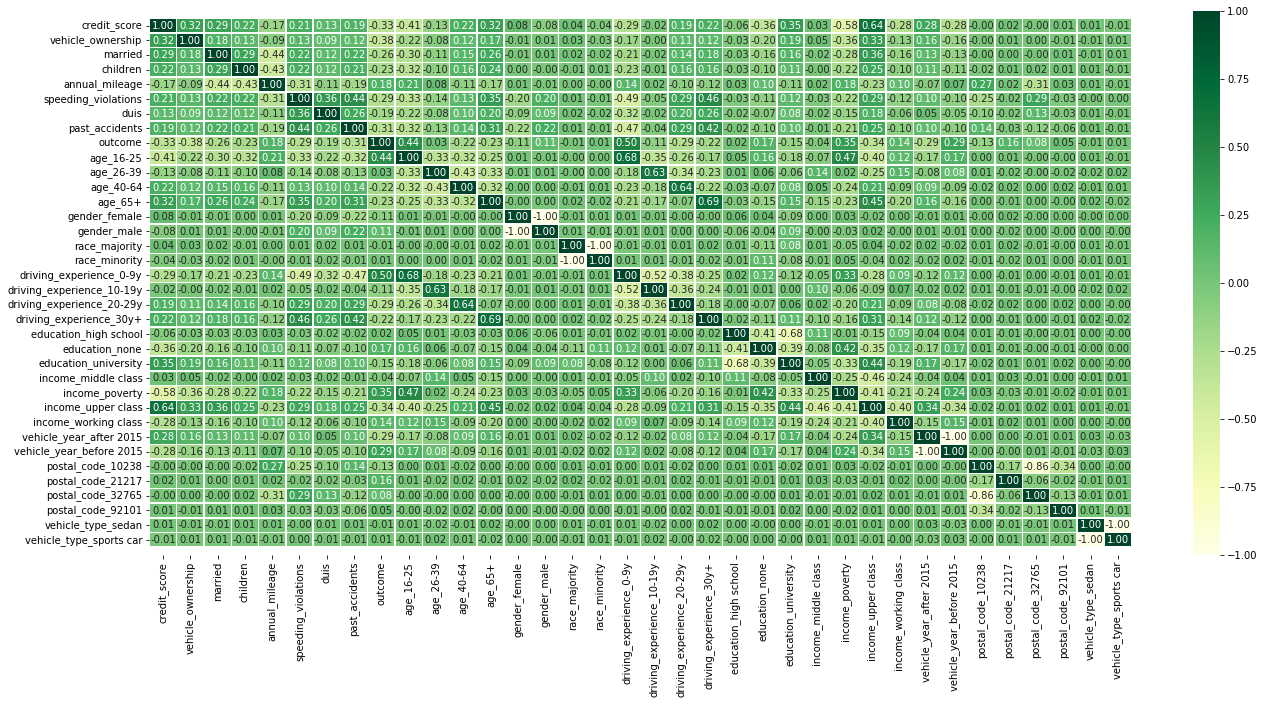

In [25]:
corr_matrix = dumm_data.corr()
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

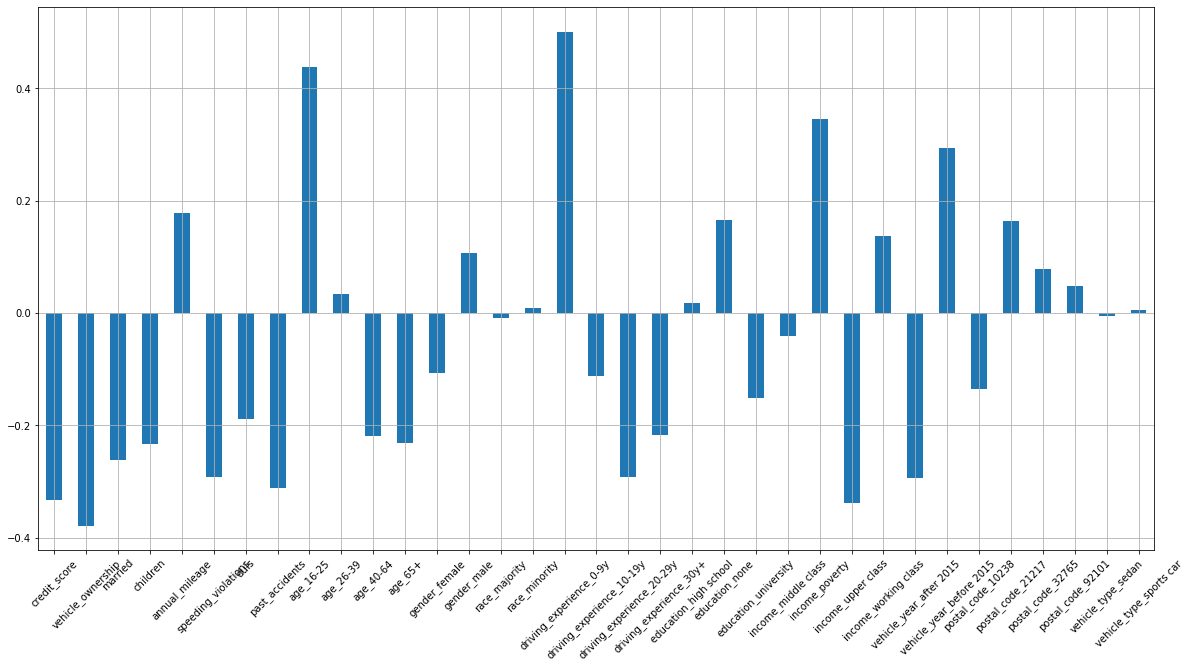

In [26]:
dumm_data.drop(columns = ['outcome']).corrwith(dumm_data.outcome).plot.bar(figsize = (20,10), grid = True, rot = 45)

Можем отметить высокую корреляцию между высоким уровнем дохода и высоким кредитным рейтингом. Кроме того, скореллированны между собой опыт вождения и нахождение в соответствующей возрастной группе. Тем не менее, сначала попробуем моделировать без обработки скоррелированных признаков.

In [27]:
dumm_data.describe()

,credit_score,vehicle_ownership,married,children,annual_mileage,speeding_violations,duis,past_accidents,outcome,age_16-25,...,income_upper class,income_working class,vehicle_year_after 2015,vehicle_year_before 2015,postal_code_10238,postal_code_21217,postal_code_32765,postal_code_92101,vehicle_type_sedan,vehicle_type_sports car
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.515429,0.697000,0.498200,0.688800,11726.000000,1.482900,0.23920,1.056300,0.313300,0.201600,...,0.433600,0.171200,0.303300,0.696700,0.694000,0.012000,0.245600,0.048400,0.952300,0.047700
std,0.134677,0.459578,0.500022,0.463008,2681.649329,2.241966,0.55499,1.652454,0.463858,0.401215,...,0.495596,0.376702,0.459707,0.459707,0.460853,0.108891,0.430464,0.214621,0.213141,0.213141
min,0.053358,0.000000,0.000000,0.000000,2000.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.421301,0.000000,0.000000,0.000000,10000.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.526747,1.000000,0.000000,1.000000,12000.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.616289,1.000000,1.000000,1.000000,13000.000000,2.000000,0.00000,2.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.960819,1.000000,1.000000,1.000000,22000.000000,22.000000,6.00000,15.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Разобьём данные на тренировочную и тестовую выборки

In [28]:
X = dumm_data.drop(['outcome'], axis=1)
y = dumm_data['outcome']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from collections import Counter
counter = Counter(y_train)
print(counter)

Counter({0.0: 5500, 1.0: 2500})


Масштабируем данные

In [31]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Сбалансируем данные при помощи метода SMOTE библиотеки imbalanced-learn

In [32]:

from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=33)
X_train, y_train = oversample.fit_resample(X_train, y_train)


In [33]:
counter = Counter(y_train)
print(counter)

Counter({0.0: 5500, 1.0: 5500})


## Приступим к поиску модели

* Рассмотрим 3 модели:  LogisticRegression, GradientBoostingClassifier и KNeighborsClassifier
* В качестве метрики для сравнения будем ориентироваться на accuracy и f1-score. Как правило, страховая компания не может отказать отказать клиенту в оформлении страховки, поэтому трудно сказать, что в данном случае важнее - precision или recall. Если сводить к задаче кредитного скорринга, где есть возможность отказать потенциальному клиенту, то низкий recall означает высокие потери из-за ошибок 2 рода, низкий precision - недополученных клиентов (и прибыль) из-за ошибок 1 рода. В любом случае, для уточнения метрики необходима информация от заказчика

 
  Logistic  accuracy :  84  %  
 
  knClassifier  accuracy :  79  %  
 
  gBoost  accuracy :  85  %  
 
 
  Logistic  : 
 
               precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      1254
         1.0       0.84      0.71      0.77       746

    accuracy                           0.84      2000
   macro avg       0.84      0.82      0.83      2000
weighted avg       0.84      0.84      0.84      2000

 
 
  knClassifier  : 
 
               precision    recall  f1-score   support

         0.0       0.80      0.89      0.84      1239
         1.0       0.78      0.65      0.71       761

    accuracy                           0.80      2000
   macro avg       0.79      0.77      0.78      2000
weighted avg       0.80      0.80      0.79      2000

 
 
  gBoost  : 
 
               precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1331
         1.0       0.80      0.75      0.78       669

    accura

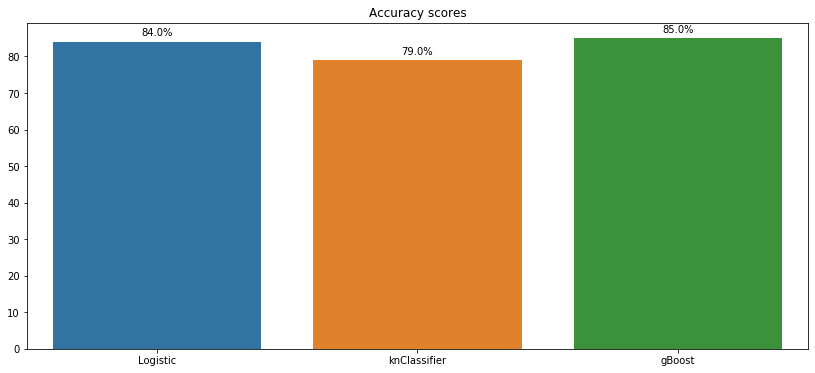

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

models = {
    "Logistic": LogisticRegression(),
    "knClassifier": KNeighborsClassifier(n_neighbors = 5),
    "gBoost": GradientBoostingClassifier(),
}

accuracy_scores = []
predicted = []

for i in models:
    models[i].fit(X_train, y_train)
    y_pred = models[i].predict(X_test)
    accuracy_scores.append(int(accuracy_score(y_pred, y_test) * 100))
    predicted.append(y_pred)

for j, k in zip(accuracy_scores, models):
    print (' \n ', k, ' accuracy : ', j, ' %  ')
    
for i, j in zip(list(models.keys()), predicted):
    print (' \n \n ', i, ' : \n \n', classification_report(j, y_test))    


plt.figure(figsize = (14, 6))
plt.title('Accuracy scores')
ax = sns.barplot(x = list(models.keys()), y = accuracy_scores)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center')



* Среди выбранных моделей наилучшим образом проявляет себя GradientBoostingClassifier. Для данной модели найдём оптимальные значения гиперпараметров

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:

# Поскольку оптимизируются несколько гиперпараметров,
# двумерный график зависимости ошибки (Error) от значения гиперпараметра построить проблематично)

model = GradientBoostingClassifier()
params = [{'n_estimators':[30,50,70,90,100],'criterion':['friedman_mse','mse'],'loss':['log_loss','deviance','exponential'],'learning_rate':[0.1, 0.3, 0.5, 0.8, 1],'random_state':[0]}]
grid = GridSearchCV(estimator=model,param_grid = params, scoring = 'accuracy',cv=2)
grid.fit(X_train, y_train)
best_accuracy = grid.best_score_
best_param = grid.best_params_
print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
print('Best Parameters : ',best_param)
print('')
print('----------------')
print('')

Rectangle(xy=(1.6, 0), width=0.8, height=85, angle=0):
Best Accuracy : 86.04%
Best Parameters :  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 50, 'random_state': 0}

----------------



Обучим данную модель и визуализируем результаты

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89      1367
         1.0       0.74      0.82      0.78       633

    accuracy                           0.85      2000
   macro avg       0.83      0.84      0.83      2000
weighted avg       0.86      0.85      0.85      2000

ROC AUC score: 0.9211988522045831
Accuracy Score:  0.853


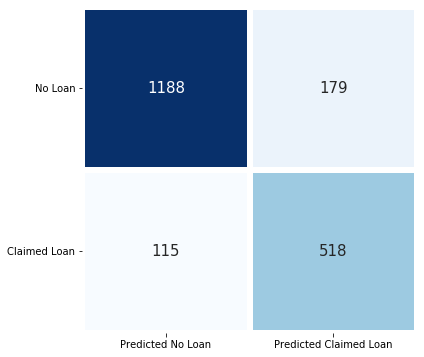

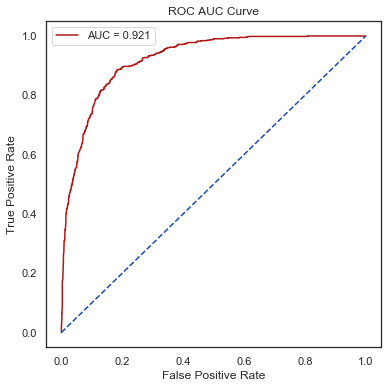

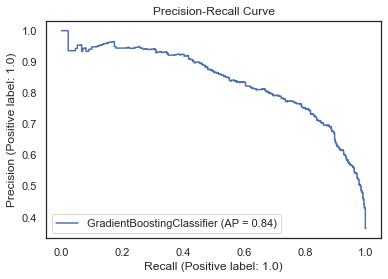

In [38]:

classifier = GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 0.1, loss= 'deviance', n_estimators= 50, random_state= 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))


plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
sns.set_theme(style = 'white')
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()


average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

### Подведём итоги
* Итоговая модель: GradientBoostingClassifier(criterion= 'friedman_mse', learning_rate= 0.1, loss= 'deviance', n_estimators= 50, random_state= 0). Accuracy Score:  0.853, precision: 0.74, recall: 0.82, f1-score: 0.78, AUC: 0.921.
* Модель достаточно эффективно предсказывает принадлежность объекта к одному из классов (accuracy близко к другим примерам для рассматриваемых данных на Kaggle)
* При моделировании не учитывалась мультиколлениарность некоторых объясняющих переменных. Возможно, при её учете качество модели можно повысить
* Строго говоря, масштабирование данных необходимо не для всех моделей, с градиентным бустингом и логистической регрессией можно было бы попробовать работать без масштабирования. Хотя, вряд ли это существенно изменило бы результаты моделирования. Кроме того нет твёрдой уверенности, не попортили ли мы данные, масштабировав всё подряд, включая категориальные признаки, - тут, так сказать, требуется дополнительный анализ
* Не очевидно, необходима ли в данном случае была балансировка классов, поскольку дисбаланс не слишком большой. Можно было бы попробовать и без неё
* В целом, результаты можно считать удовлетворительными)